## 투자 성과 지표

- 단일 종목 일간수익률
- 단일 종목 누적수익률
- CAGR
- MDD

In [1]:
import pandas as pd 
import numpy as np

In [3]:
data = {'close' : [100, 95, 101, 103, 90, 95, 110, 98,101]} # 9일간 가격 데이터
index = pd.to_datetime(["2022-05-17", "2022-05-18", "2022-05-19", "2022-05-20", "2022-05-23", "2022-05-24", "2022-05-25", "2022-05-26", "2022-05-27"])
df = pd.DataFrame(data=data, index=index)
df

,close
2022-05-17,100
2022-05-18,95
2022-05-19,101
2022-05-20,103
2022-05-23,90
2022-05-24,95
2022-05-25,110
2022-05-26,98
2022-05-27,101


<AxesSubplot:>

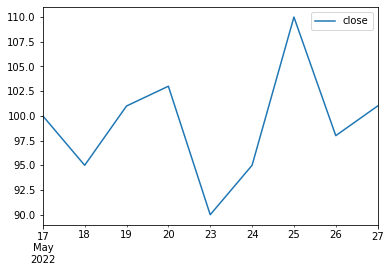

In [4]:
df.plot()

### 단일종목 일간 수익률

- 일간 수익률 = 당기 가격 / 전기 가격으로 계산 
- 판다스의 shift 메서드를 이용해서 간편하게 계산
- shift(n) => n만큼 아래로 이동시키는 기능

In [5]:
df.shift(1)

,close
2022-05-17,NaN
2022-05-18,100.0
2022-05-19,95.0
2022-05-20,101.0
2022-05-23,103.0
2022-05-24,90.0
2022-05-25,95.0
2022-05-26,110.0
2022-05-27,98.0


In [10]:
dayReturn = df / df.shift(1)
dayReturn = dayReturn.fillna(1) # 첫 번째 수익률은 1

### 단일종목 누적 수익률

- 주가의 움직임은 복리입니다
- 일간 수익률을 누적곱해주면 누적 수익률을 구할 수 있습니다.
- cumprod()메서드를 사용하면 누적곱을 구할 수 있습니다

In [11]:
cumulativeReturn = dayReturn.cumprod()
cumulativeReturn

,close
2022-05-17,1.00
2022-05-18,0.95
2022-05-19,1.01
2022-05-20,1.03
2022-05-23,0.90
2022-05-24,0.95
2022-05-25,1.10
2022-05-26,0.98
2022-05-27,1.01


누적수익률은 `자산의 흐름` 과 같다고 볼 수 있음

### CAGR(Compound Annual Growth Rate)

투자수익률을 계산할 때는 복리 개념이므로, 흔히 알고 있는 산술평균이 아니라 기하평균으로 계산해야 함

- 산술평균 = 합의 평균
- 기하평균 = 곱의 평균
 
> 1년차 수익률 5% 

> 2년차 수익률 10%

2년 투자 기간 동안 연 평균 수익률을 k라고 하면

k = sqrt(0.05 * 0.1)

<b>하지만 우리는 앞으로 일간 데이터를 사용할 것이기 때문에, 일간 데이터를 활용하여 연간 수익률 계산하기 위해서는</b>

`일간 수익률 갯수 / 영업일` 역수 제곱으로 연산

일반적으로 금융공학에서는 1년의 총 영업일을 252일로 간주



In [12]:
len(df)

9

In [14]:
cagr = cumulativeReturn.iloc[-1] ** (252 / len(df))
cagr

close    1.321291
Name: 2022-05-27 00:00:00, dtype: float64

### Draw Down(하락폭) & Max Draw Down (최대 하락폭)

최대 낙폭지수 - 투자 기간 동안 고점부터 떨어진 낙폭 최댓값 의미

- 하락폭(MD) = (최고점 - 현재) / 최고점
- 최대하락폭(MDD) = max((최고점 - 현재) / 최고점)

pandas의 cummax() 메서드를 사용하면 데이터를 위에서부터 아래로 조회하며 최댓값을 갱신

In [15]:
cumulativeReturn

,close
2022-05-17,1.00
2022-05-18,0.95
2022-05-19,1.01
2022-05-20,1.03
2022-05-23,0.90
2022-05-24,0.95
2022-05-25,1.10
2022-05-26,0.98
2022-05-27,1.01


In [16]:
cumulativeReturn.cummax()

,close
2022-05-17,1.00
2022-05-18,1.00
2022-05-19,1.01
2022-05-20,1.03
2022-05-23,1.03
2022-05-24,1.03
2022-05-25,1.10
2022-05-26,1.10
2022-05-27,1.10


#### MDD 계산

In [21]:
dd = (cumulativeReturn.cummax() - cumulativeReturn) / cumulativeReturn.max() * 100
dd

,close
2022-05-17,0.000000
2022-05-18,4.545455
2022-05-19,0.000000
2022-05-20,0.000000
2022-05-23,11.818182
2022-05-24,7.272727
2022-05-25,0.000000
2022-05-26,10.909091
2022-05-27,8.181818


In [23]:
mdd = dd.max()
mdd

close    11.818182
dtype: float64